#Librarys and Dependencies

In [ ]:
!pip install sweetviz
!pip install boto3

import pandas as pd
import numpy as np
import boto3
import sweetviz as sv
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


import math
import scipy.stats

%matplotlib inline
plt.style.use('ggplot')
import seaborn as sns

from sklearn.model_selection import train_test_split

# OPCIONES DE VISUALIZACIÓN DE LOS DATAFRAMES.
pd.set_option('display.max_columns', None)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 61.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.8/135.8 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.2/11.2 MB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.8/79.8 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.1/143.1 kB 14.1 MB/s eta 0:00:00
  Attempting uninstall: urllib3
    Found existing installation: urllib3 2.0.4
    Uninstalling urllib3-2.0.4:
      Successfully uninstalled urllib3-2.0.4


In [ ]:
!pip install h2o
%matplotlib inline
import h2o
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import IsolationForest
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.9/240.9 MB 3.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for h2o: filename=h2o-3.42.0.3-py2.py3-none-any.whl size=240945068 sha256=16163a47ceca3e505c962a82d70ab288a263ebe0f3471164ca522a86aa5b4025
  Stored in directory: /root/.cache/pip/wheels/f9/7d/1d/e1258f0558603969a8393cb5b22a18e313337f01627a118302
Successfully built h2o


#Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

df_madrid = pd.read_csv('/content/drive/MyDrive/Proyecto Final Idealista/Dataset/Datasets_de_trabajo/ultimate_df_madrid (1).csv', sep=';', encoding='latin-1')
df_madrid.head()

,ASSETID,PERIOD,PRICE,UNITPRICE,ADTYPOLOGYID,ADOPERATIONID,CONSTRUCTEDAREA,ROOMNUMBER,BATHNUMBER,HASTERRACE,HASLIFT,HASAIRCONDITIONING,AMENITYID,HASPARKINGSPACE,ISPARKINGSPACEINCLUDEDINPRICE,PARKINGSPACEPRICE,HASNORTHORIENTATION,HASSOUTHORIENTATION,HASEASTORIENTATION,HASWESTORIENTATION,HASBOXROOM,HASWARDROBE,HASSWIMMINGPOOL,HASDOORMAN,HASGARDEN,ISDUPLEX,ISSTUDIO,ISINTOPFLOOR,CONSTRUCTIONYEAR,FLOORCLEAN,FLATLOCATIONID,CADCONSTRUCTIONYEAR,CADMAXBUILDINGFLOOR,CADDWELLINGCOUNT,CADASTRALQUALITYID,BUILTTYPEID_1,BUILTTYPEID_2,BUILTTYPEID_3,DISTANCE_TO_CITY_CENTER,DISTANCE_TO_METRO,DISTANCE_TO_CASTELLANA,CITYNAME,ADTYPOLOGY,ADOPERATION,LOGPRICE,geometry,CUSEC,index_right,LOCATIONID,LOCATIONNAME
0,A15019136831406238029,201803,126000,2680.851064,HOME,SALE,47,1,1,0,1,1,3,0,0,1,0,0,0,0,1,1,1,1,1,0,0,0,2005.0,1.0,1.0,2005,7,319,3.0,0,1,0,8.058429,0.872075,6.868677,Madrid,HOME,SALE,11.744037,POINT (-3.76693282740492 40.3624847687389),2807911190,123,0-EU-ES-28-07-001-079-11-008,Pau de Carabanchel
1,A18358421103986858200,201803,210000,2413.793103,HOME,SALE,87,2,2,0,1,0,3,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,2006.0,1.0,1.0,2006,7,319,3.0,0,0,1,8.102608,0.891646,6.899154,Madrid,HOME,SALE,12.254863,POINT (-3.76700985199253 40.3620067753309),2807911190,123,0-EU-ES-28-07-001-079-11-008,Pau de Carabanchel
2,A12760275757741995501,201803,207000,2379.310345,HOME,SALE,87,2,2,0,1,0,3,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,NaN,1.0,NaN,2005,7,319,3.0,0,1,0,8.092701,0.863863,6.876878,Madrid,HOME,SALE,12.240474,POINT (-3.76660771605248 40.3618562868501),2807911190,123,0-EU-ES-28-07-001-079-11-008,Pau de Carabanchel
3,A15624054548296987840,201803,176000,3142.857143,HOME,SALE,56,1,1,0,1,1,3,1,1,1,0,0,0,0,1,1,1,0,1,0,0,0,NaN,6.0,1.0,2005,7,319,3.0,0,0,1,8.080657,0.872988,6.878479,Madrid,HOME,SALE,12.078239,POINT (-3.7668348377265 40.362152081612),2807911190,123,0-EU-ES-28-07-001-079-11-008,Pau de Carabanchel
4,A1152949908600176968,201803,236000,2712.643678,HOME,SALE,87,2,2,0,1,0,3,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,2006.0,1.0,1.0,2006,7,319,3.0,0,0,1,8.078538,0.878235,6.880998,Madrid,HOME,SALE,12.371587,POINT (-3.76693007087736 40.3622415411731),2807911190,123,0-EU-ES-28-07-001-079-11-008,Pau de Carabanchel


In [ ]:
df_madrid.columns

Index(['ASSETID', 'PERIOD', 'PRICE', 'UNITPRICE', 'ADTYPOLOGYID',
       'ADOPERATIONID', 'CONSTRUCTEDAREA', 'ROOMNUMBER', 'BATHNUMBER',
       'HASTERRACE', 'HASLIFT', 'HASAIRCONDITIONING', 'AMENITYID',
       'HASPARKINGSPACE', 'ISPARKINGSPACEINCLUDEDINPRICE', 'PARKINGSPACEPRICE',
       'HASNORTHORIENTATION', 'HASSOUTHORIENTATION', 'HASEASTORIENTATION',
       'HASWESTORIENTATION', 'HASBOXROOM', 'HASWARDROBE', 'HASSWIMMINGPOOL',
       'HASDOORMAN', 'HASGARDEN', 'ISDUPLEX', 'ISSTUDIO', 'ISINTOPFLOOR',
       'CONSTRUCTIONYEAR', 'FLOORCLEAN', 'FLATLOCATIONID',
       'CADCONSTRUCTIONYEAR', 'CADMAXBUILDINGFLOOR', 'CADDWELLINGCOUNT',
       'CADASTRALQUALITYID', 'BUILTTYPEID_1', 'BUILTTYPEID_2', 'BUILTTYPEID_3',
       'DISTANCE_TO_CITY_CENTER', 'DISTANCE_TO_METRO',
       'DISTANCE_TO_CASTELLANA', 'CITYNAME', 'ADTYPOLOGY', 'ADOPERATION',
       'LOGPRICE', 'geometry', 'CUSEC', 'index_right', 'LOCATIONID',
       'LOCATIONNAME'],
      dtype='object')

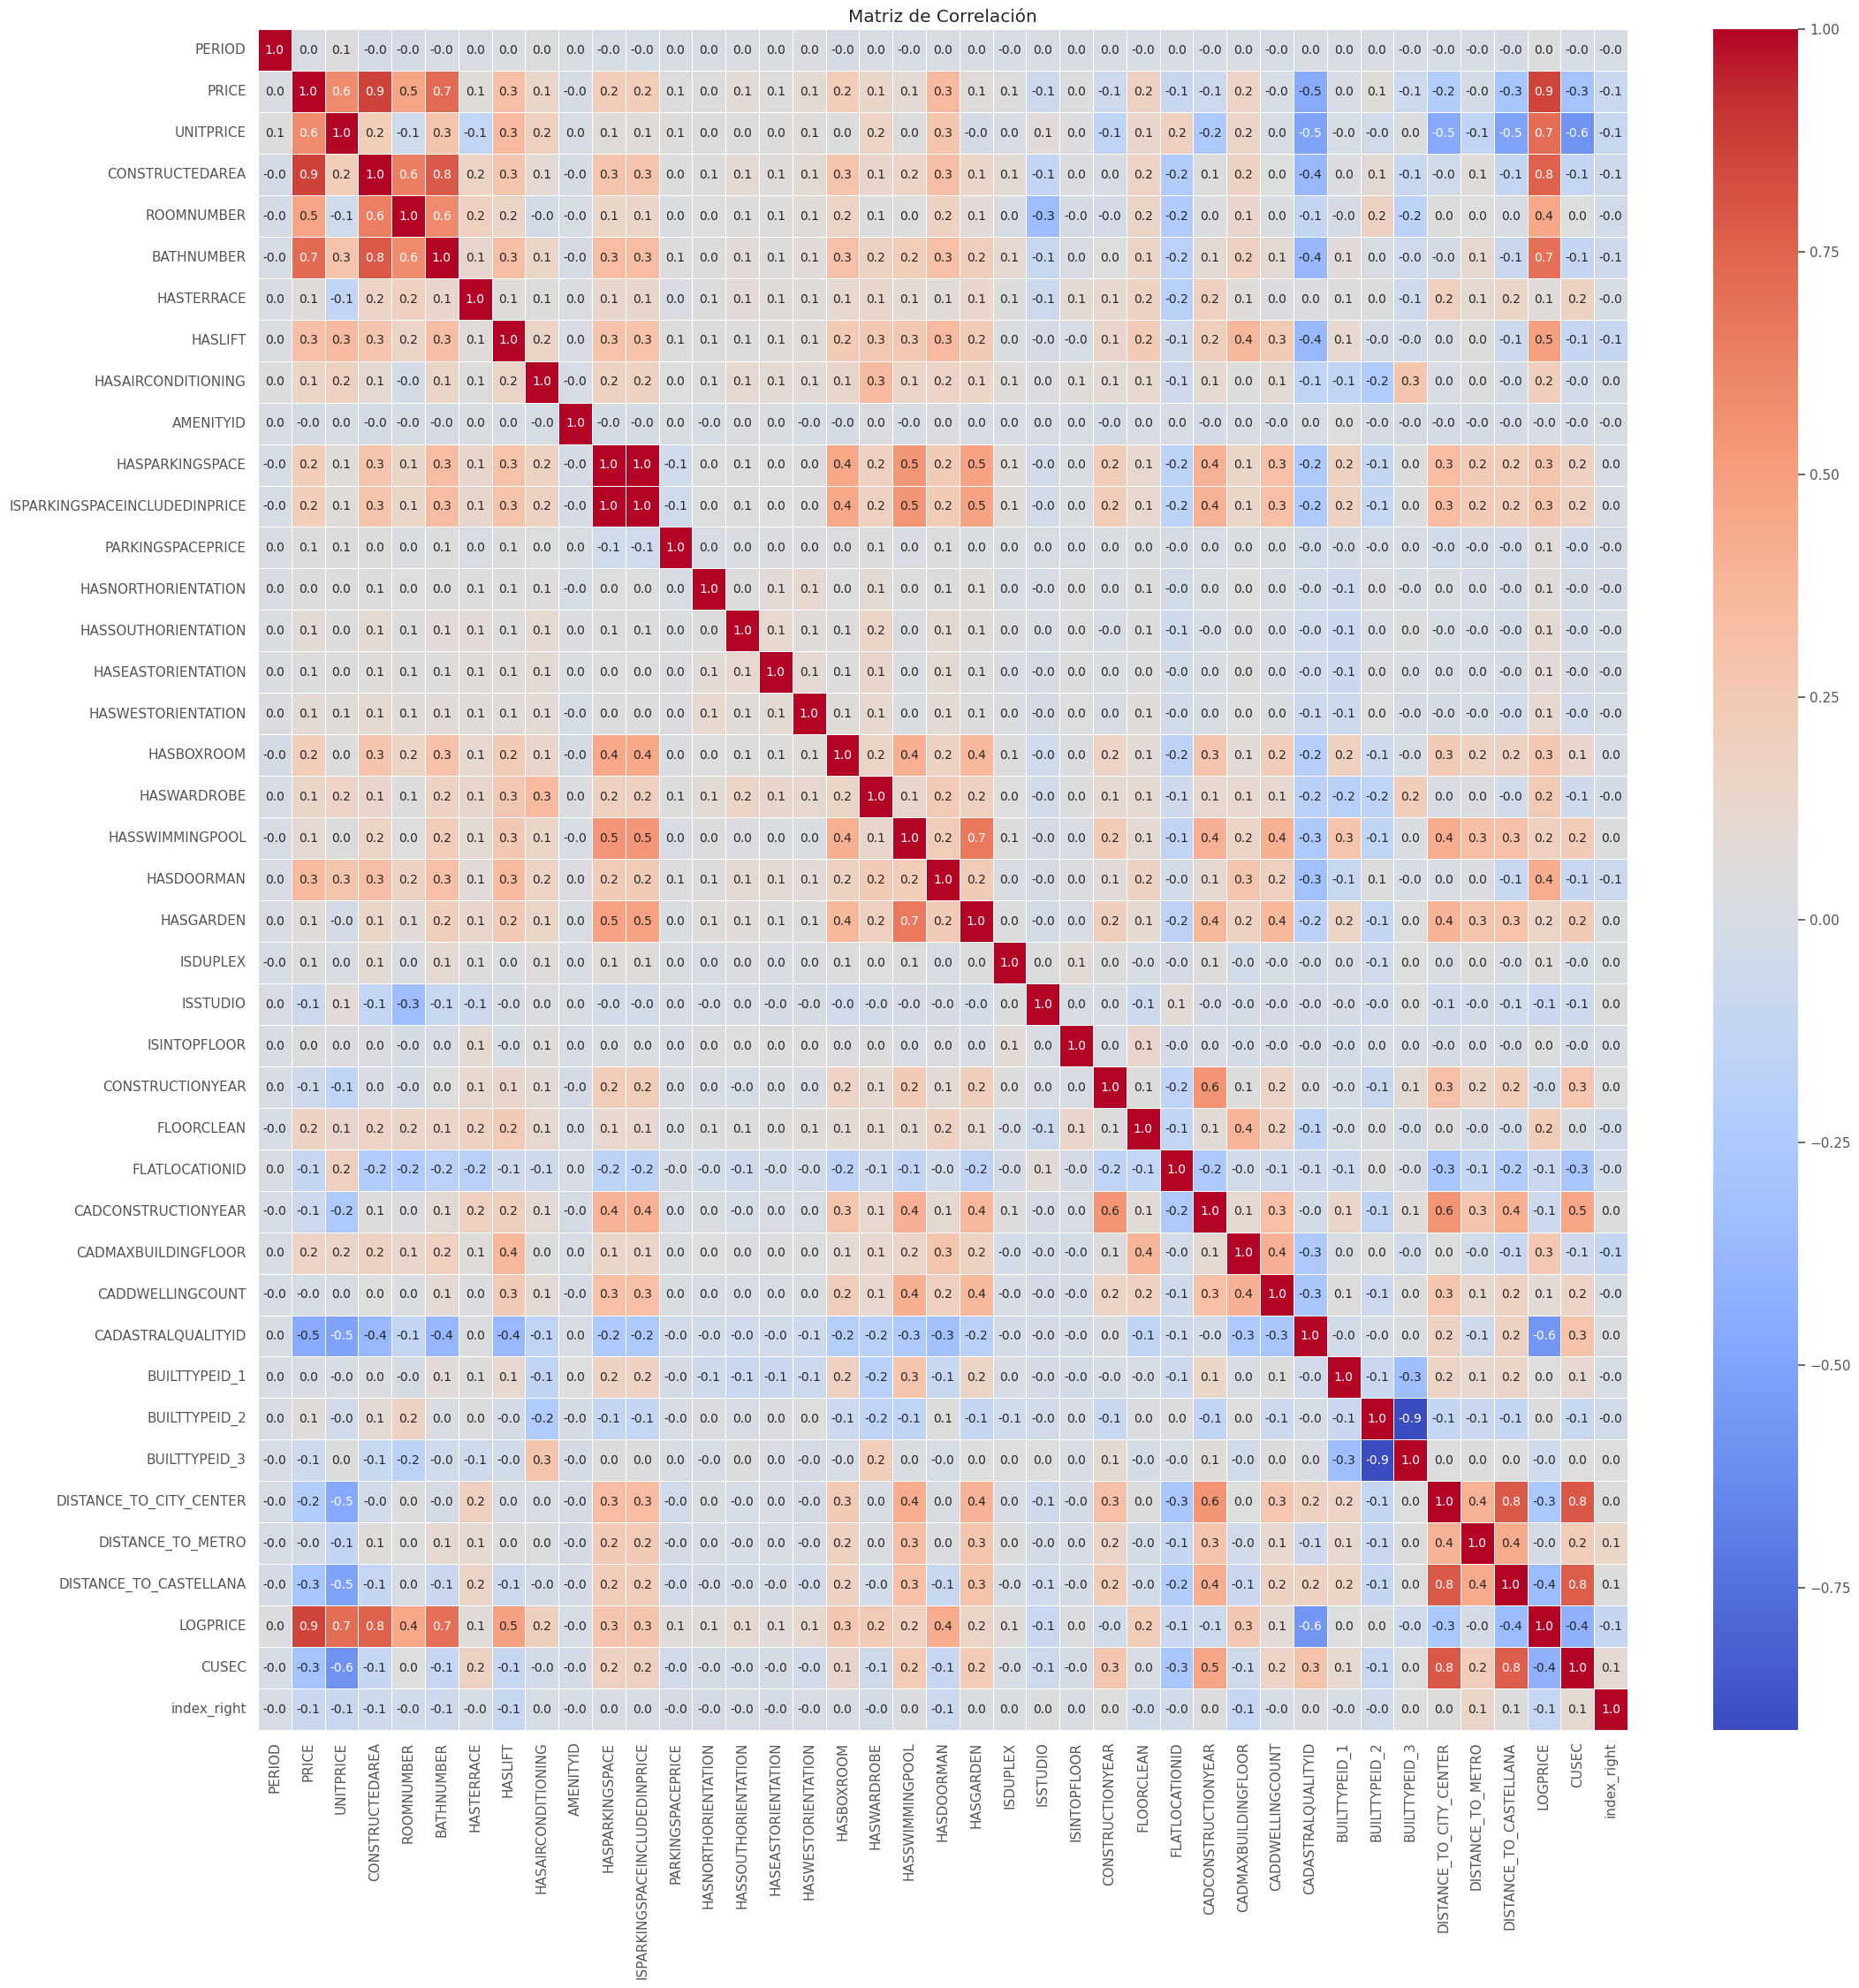

In [ ]:
columnas_numericas = df_madrid.select_dtypes(include=['float64', 'int64'])
matriz_correlacion = columnas_numericas.corr()
plt.figure(figsize=(25, 25))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', linewidths=.5,  fmt='.1f')
plt.title('Matriz de Correlación')
plt.show()

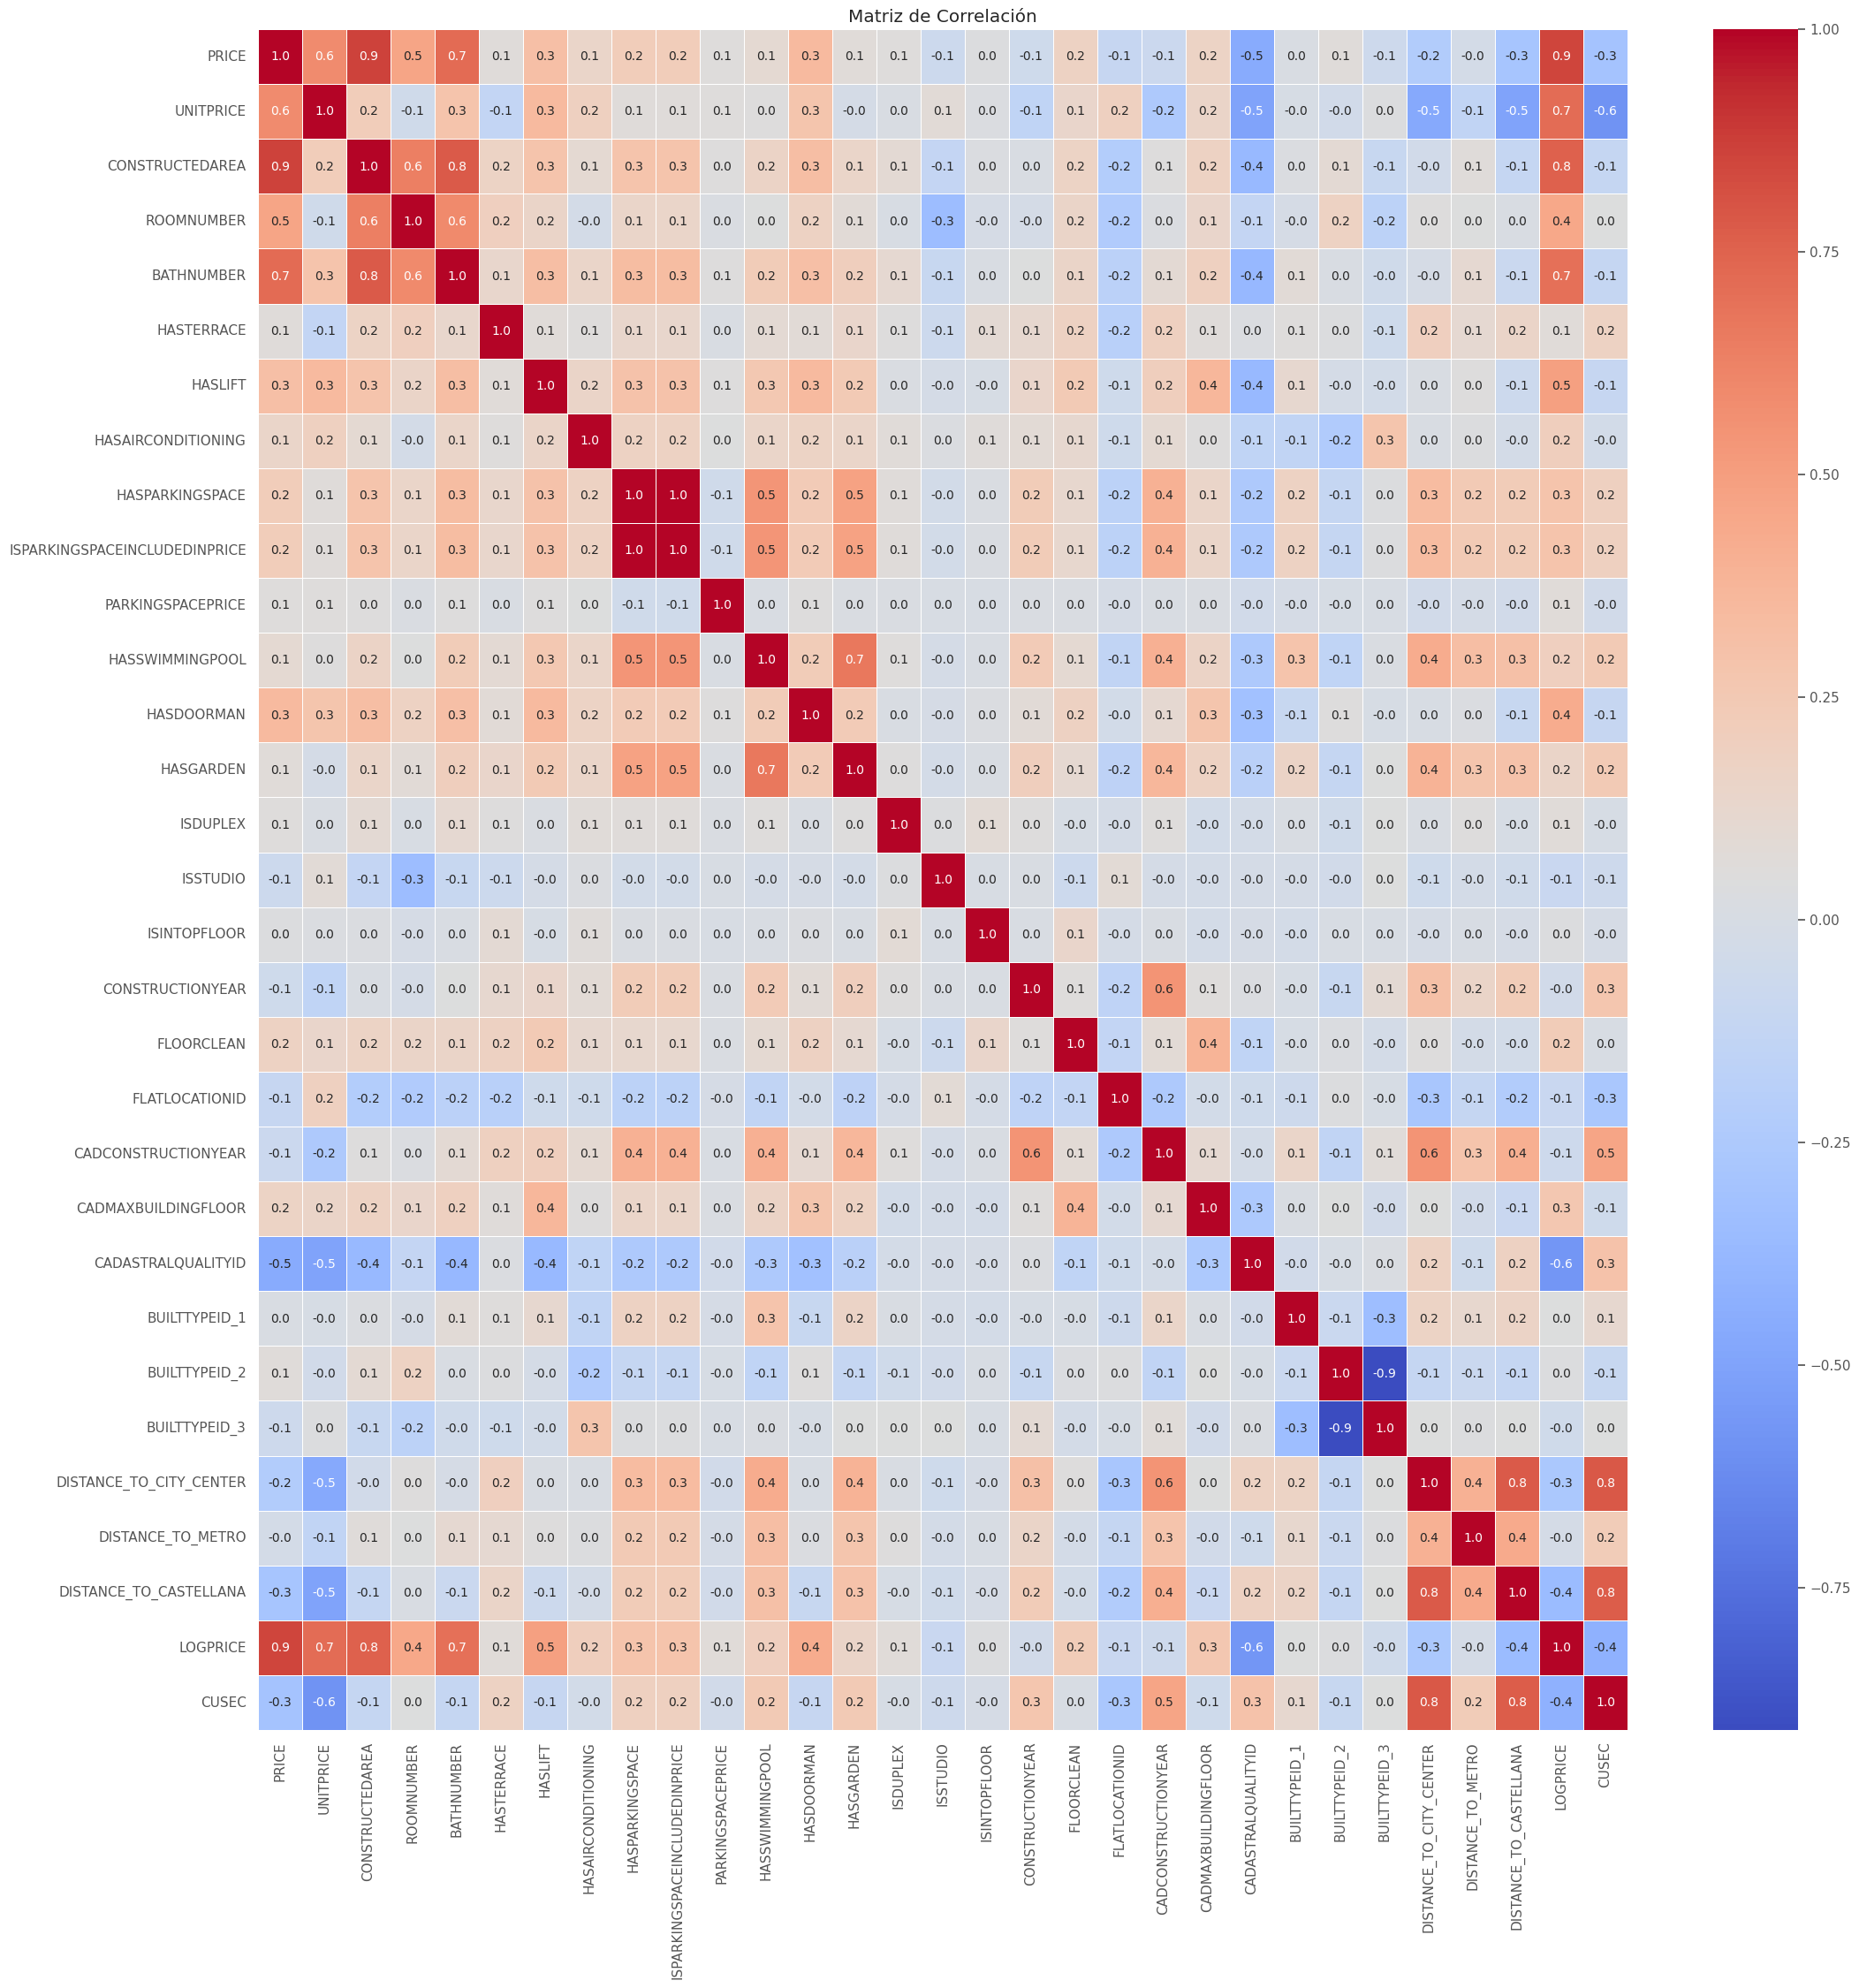

In [ ]:
columnas_a_eliminar = ['PERIOD', 'AMENITYID', 'HASNORTHORIENTATION', 'HASSOUTHORIENTATION', 'HASEASTORIENTATION',
                       'HASWESTORIENTATION', 'HASBOXROOM', 'HASWARDROBE', 'index_right', 'CADDWELLINGCOUNT']

# Elimina las columnas especificadas
df_madrid2 = df_madrid.drop(columns=columnas_a_eliminar, errors='ignore')

# Selecciona las columnas numéricas relevantes
columnas_numericas = df_madrid2.select_dtypes(include=['float64', 'int64'])

# Calcula la matriz de correlación
matriz_correlacion = columnas_numericas.corr()

# Visualiza la matriz de correlación con números redondeados a 1 decimal
plt.figure(figsize=(25, 25))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', linewidths=.5, fmt='.1f')
plt.title('Matriz de Correlación')
plt.show()

In [ ]:
variables_list = list(df_madrid.columns.values)
variables_list

['ASSETID',
 'PERIOD',
 'PRICE',
 'UNITPRICE',
 'ADTYPOLOGYID',
 'ADOPERATIONID',
 'CONSTRUCTEDAREA',
 'ROOMNUMBER',
 'BATHNUMBER',
 'HASTERRACE',
 'HASLIFT',
 'HASAIRCONDITIONING',
 'AMENITYID',
 'HASPARKINGSPACE',
 'ISPARKINGSPACEINCLUDEDINPRICE',
 'PARKINGSPACEPRICE',
 'HASNORTHORIENTATION',
 'HASSOUTHORIENTATION',
 'HASEASTORIENTATION',
 'HASWESTORIENTATION',
 'HASBOXROOM',
 'HASWARDROBE',
 'HASSWIMMINGPOOL',
 'HASDOORMAN',
 'HASGARDEN',
 'ISDUPLEX',
 'ISSTUDIO',
 'ISINTOPFLOOR',
 'CONSTRUCTIONYEAR',
 'FLOORCLEAN',
 'FLATLOCATIONID',
 'CADCONSTRUCTIONYEAR',
 'CADMAXBUILDINGFLOOR',
 'CADDWELLINGCOUNT',
 'CADASTRALQUALITYID',
 'BUILTTYPEID_1',
 'BUILTTYPEID_2',
 'BUILTTYPEID_3',
 'DISTANCE_TO_CITY_CENTER',
 'DISTANCE_TO_METRO',
 'DISTANCE_TO_CASTELLANA',
 'CITYNAME',
 'ADTYPOLOGY',
 'ADOPERATION',
 'LOGPRICE',
 'geometry',
 'CUSEC',
 'index_right',
 'LOCATIONID',
 'LOCATIONNAME']

In [ ]:
columns_to_drop = [#'ASSETID',
 #'PERIOD',
 #'PRICE',
 #'UNITPRICE',
 'ADTYPOLOGYID',
 'ADOPERATIONID',
 #'CONSTRUCTEDAREA',
 #'ROOMNUMBER',
 #'BATHNUMBER',
 'HASTERRACE',
 #'HASLIFT',
 'HASAIRCONDITIONING',
 'AMENITYID',
 'HASPARKINGSPACE',
 'ISPARKINGSPACEINCLUDEDINPRICE',
 'PARKINGSPACEPRICE',
 'HASNORTHORIENTATION',
 'HASSOUTHORIENTATION',
 'HASEASTORIENTATION',
 'HASWESTORIENTATION',
 'HASBOXROOM',
 'HASWARDROBE',
 'HASSWIMMINGPOOL',
 'HASDOORMAN',
 'HASGARDEN',
 #'ISDUPLEX',
 #'ISSTUDIO',
 'ISINTOPFLOOR',
 'CONSTRUCTIONYEAR',
 'FLOORCLEAN',
 'FLATLOCATIONID',
 #'CADCONSTRUCTIONYEAR',
 'CADMAXBUILDINGFLOOR',
 'CADDWELLINGCOUNT',
 'CADASTRALQUALITYID',
 #'BUILTTYPEID_1',
 #'BUILTTYPEID_2',
 #'BUILTTYPEID_3',
 #'DISTANCE_TO_CITY_CENTER',
 #'DISTANCE_TO_METRO',
 #'DISTANCE_TO_CASTELLANA',
 'CITYNAME',
 'ADTYPOLOGY',
 'ADOPERATION',
 #'LOGPRICE',
 'geometry',
 'CUSEC',
 'index_right',
 'LOCATIONID',
 #'LOCATIONNAME'
                   ]

In [ ]:
df_madrid_kf = df_madrid.drop(columns=columns_to_drop)
df_madrid_kf.head()

,ASSETID,PERIOD,PRICE,UNITPRICE,CONSTRUCTEDAREA,ROOMNUMBER,BATHNUMBER,HASLIFT,ISDUPLEX,ISSTUDIO,CADCONSTRUCTIONYEAR,BUILTTYPEID_1,BUILTTYPEID_2,BUILTTYPEID_3,DISTANCE_TO_CITY_CENTER,DISTANCE_TO_METRO,DISTANCE_TO_CASTELLANA,LOGPRICE,LOCATIONNAME
0,A15019136831406238029,201803,126000,2680.851064,47,1,1,1,0,0,2005,0,1,0,8.058429,0.872075,6.868677,11.744037,Pau de Carabanchel
1,A18358421103986858200,201803,210000,2413.793103,87,2,2,1,0,0,2006,0,0,1,8.102608,0.891646,6.899154,12.254863,Pau de Carabanchel
2,A12760275757741995501,201803,207000,2379.310345,87,2,2,1,0,0,2005,0,1,0,8.092701,0.863863,6.876878,12.240474,Pau de Carabanchel
3,A15624054548296987840,201803,176000,3142.857143,56,1,1,1,0,0,2005,0,0,1,8.080657,0.872988,6.878479,12.078239,Pau de Carabanchel
4,A1152949908600176968,201803,236000,2712.643678,87,2,2,1,0,0,2006,0,0,1,8.078538,0.878235,6.880998,12.371587,Pau de Carabanchel


#Tratamiento de variables

####Variables a modificar


In [ ]:
#Check numeric variables
num_features = df_madrid_kf.select_dtypes(include=['int64','float64']).columns

#Seleccionamos unas cuantas variables numéricas, en num_features las tendríamos todas
num_features_selected = ['PRICE', 'UNITPRICE', 'CONSTRUCTEDAREA', 'ROOMNUMBER', 'BATHNUMBER', "DISTANCE_TO_CITY_CENTER"]

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packa

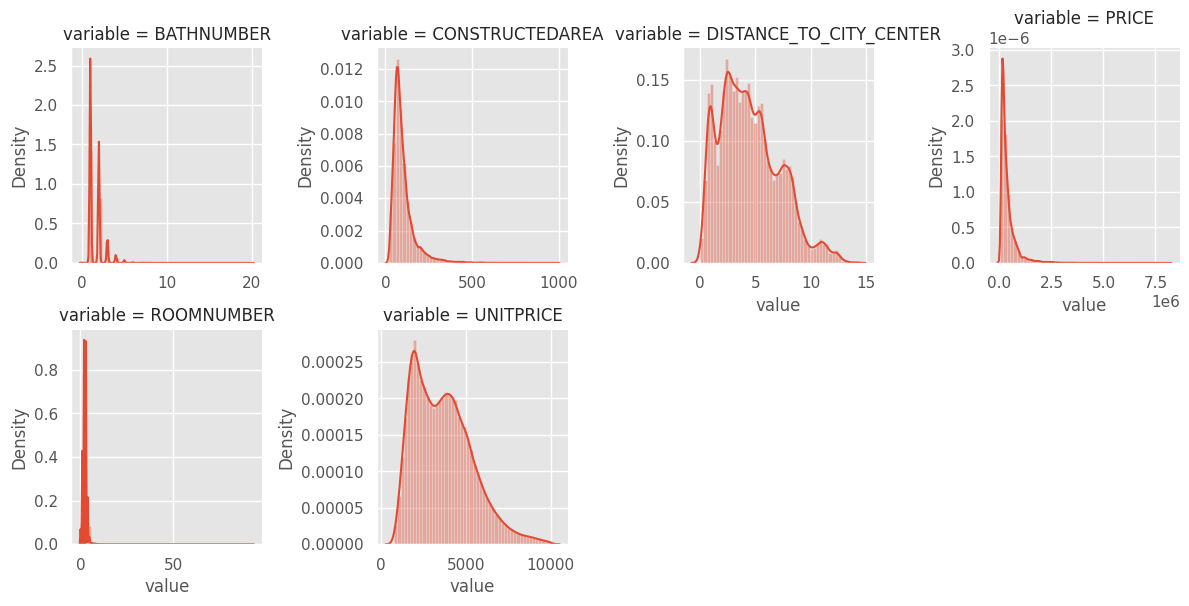

In [ ]:
# Grid of distribution plots of selected numerical features
f = pd.melt(df_madrid_kf, value_vars=sorted(num_features_selected)) #melt: Unpivot a DataFrame from wide to long format
g = sns.FacetGrid(f, col='variable', col_wrap=4, sharex=False, sharey=False) #FacetGrid: multiple plots in a grid
g = g.map(sns.distplot, 'value') #Apply a plotting function to each facet’s subset of the data.

In [ ]:
#Target encoding por precio medio de la zona

In [ ]:
#Imputaciones

In [ ]:
#Box-Cox y la transformada Yeo-Johnson para variable precio

####CONSTRUCTED AREA

In [ ]:
df_madrid_kf["CONSTRUCTEDAREA"].describe()

count    94727.000000
mean       101.351737
std         67.052528
min         21.000000
25%         62.000000
50%         83.000000
75%        117.000000
max        985.000000
Name: CONSTRUCTEDAREA, dtype: float64

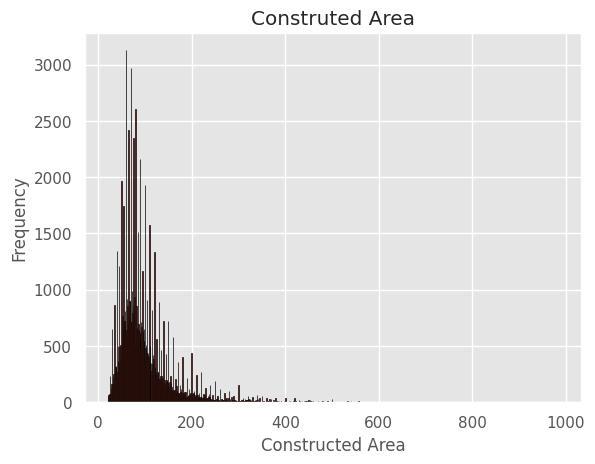

In [ ]:
plt.hist(df_madrid_kf["CONSTRUCTEDAREA"], bins=int(df_madrid_kf["CONSTRUCTEDAREA"].max()), edgecolor='black')
plt.xlabel('Constructed Area')
plt.ylabel('Frequency')
plt.title('Construted Area')
plt.show()

<Axes: xlabel='CONSTRUCTEDAREA', ylabel='LOCATIONNAME'>

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 129 (\x81) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129 (\x81) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


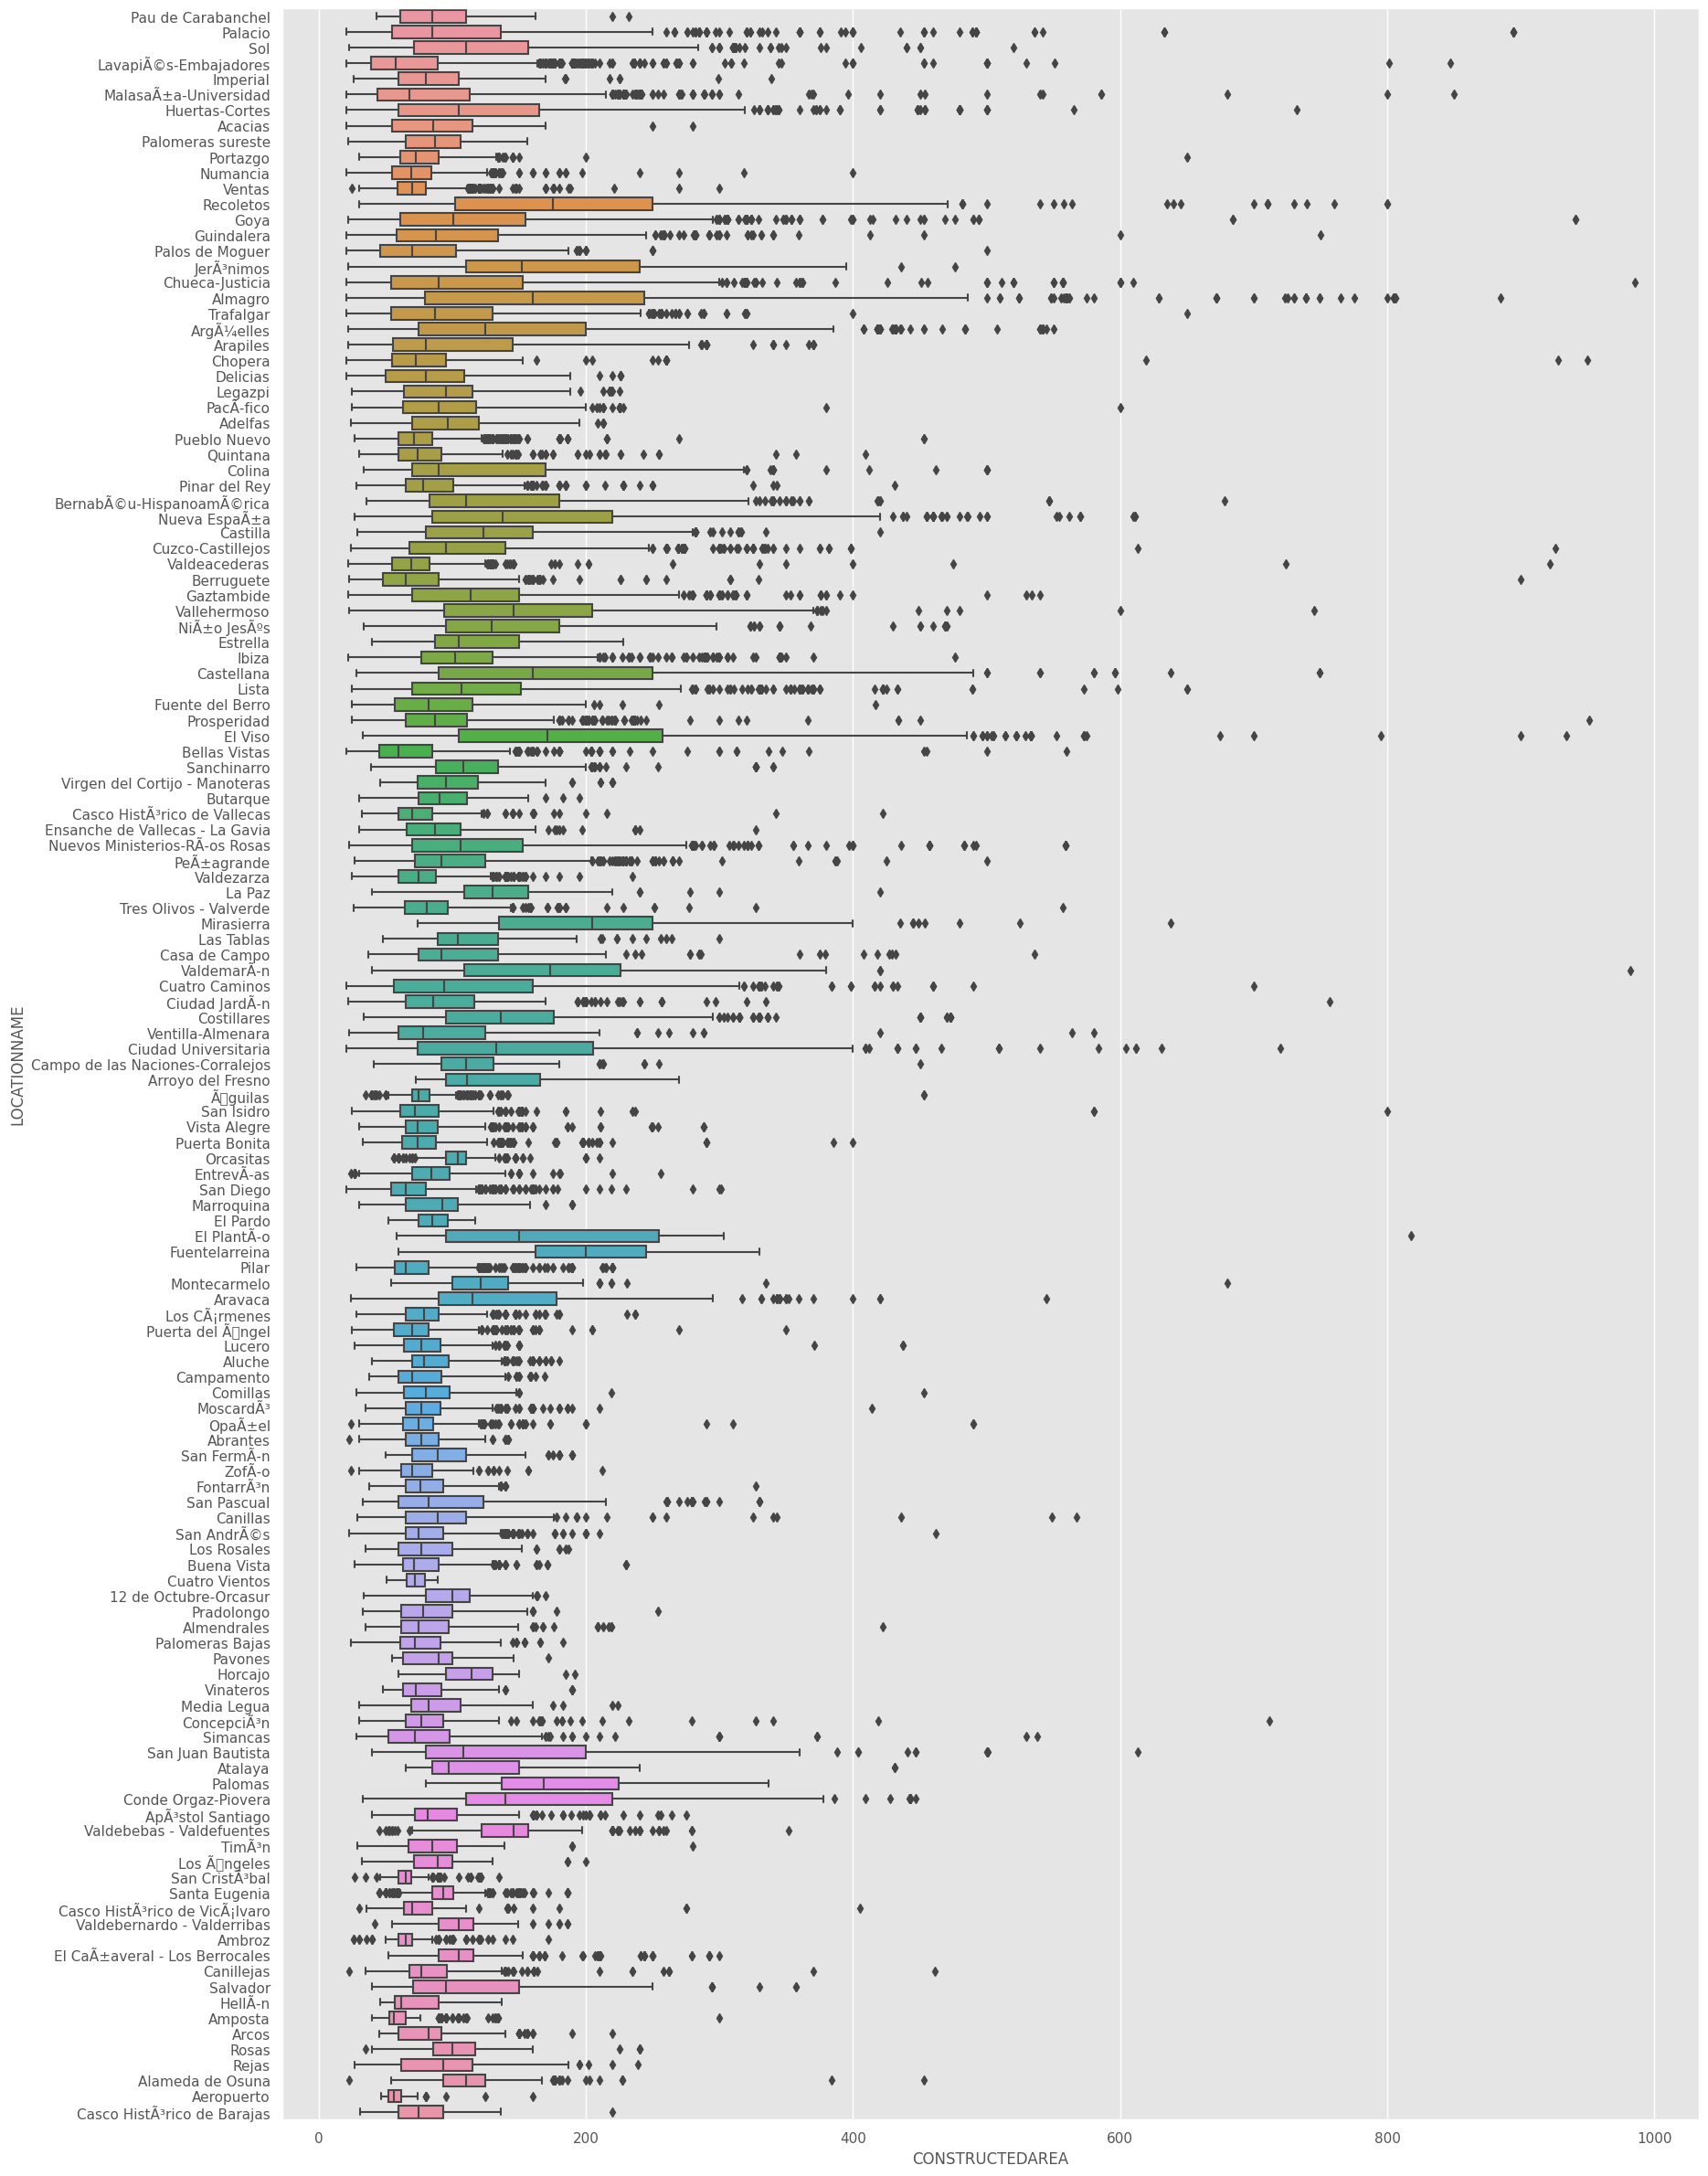

In [ ]:
fig, ax = plt.subplots(figsize=(20, 30))
sns.boxplot(data=df_madrid_kf, x="CONSTRUCTEDAREA", y="LOCATIONNAME", dodge=False)

In [ ]:
#Properties with more than 7 bathrooms
count_higher_than_X_m2 = df_madrid_kf[df_madrid_kf['CONSTRUCTEDAREA'] > 350]['CONSTRUCTEDAREA'].count()
print("Number of properties with more than X m2 is ", count_higher_than_X_m2)

Number of properties with more than X m2 is  1085


In [ ]:
#Detecting the outliers using the IQR

def detect_outliers(data_series, threshold=10):

    Q1 = np.percentile(data_series, 25)
    Q3 = np.percentile(data_series, 75)

    # Calculate the IQR (Interquartile Range)
    IQR = Q3 - Q1

    # Calculate the lower and upper bounds for outlier detection
    lower_bound = Q1 - (threshold * IQR)
    upper_bound = Q3 + (threshold * IQR)

    # Detect and return the outliers
    outliers = data_series[(data_series < lower_bound) | (data_series > upper_bound)]
    return outliers

outliers = detect_outliers(df_madrid_kf["CONSTRUCTEDAREA"])

# Display the outliers (if any)
print("Outliers:")
print(outliers)

Outliers:
736      894
754      894
1199     894
1277     894
5793     801
        ... 
62143    720
63830    800
69482    818
70547    680
86032    712
Name: CONSTRUCTEDAREA, Length: 76, dtype: int64


In [ ]:
### Metodo de la desviacion estandar

In [ ]:
def fuera_std(s, nstd=3, return_thresholds=False):

    data_media, data_std = s.mean(), s.std()
    cut_off = data_std * nstd
    limite_inferior, limite_superior = data_media - cut_off, data_media + cut_off
    if return_thresholds:
        return limite_inferior, limite_superior
    else:
        return [True if x < limite_inferior or x > limite_superior else False for x in s]

In [ ]:
outliers_std = fuera_std(df_madrid_kf.CONSTRUCTEDAREA,3,False)

<ipython-input-235-4934a35de615>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_madrid_kf['CONSTRUCTEDAREA'], kde=False);


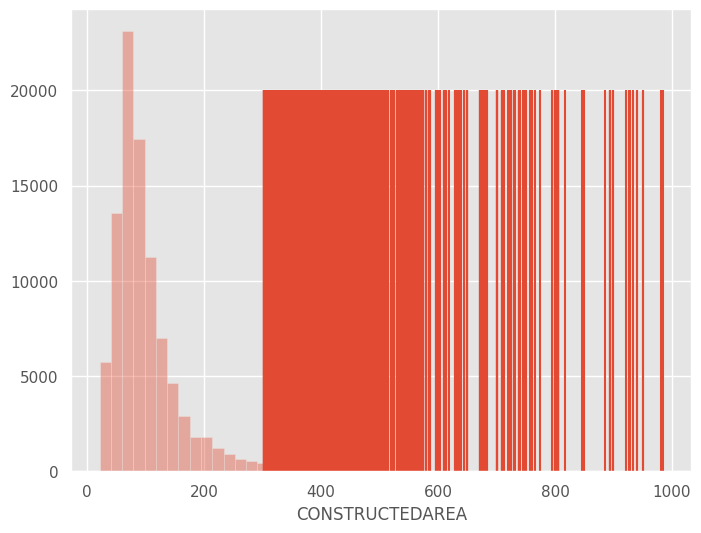

In [ ]:
plt.figure(figsize=(8,6))
sns.distplot(df_madrid_kf['CONSTRUCTEDAREA'], kde=False);
plt.vlines(df_madrid_kf['CONSTRUCTEDAREA'][outliers_std],
           ymin=0, ymax=20000,
           #linestyles='dashed'
           );

In [ ]:
#DBScan
#Isolation Forest

####BATHROOMS

In [ ]:
df_madrid_kf["BATHNUMBER"].describe()

count    94727.000000
mean         1.584585
std          0.841804
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         20.000000
Name: BATHNUMBER, dtype: float64

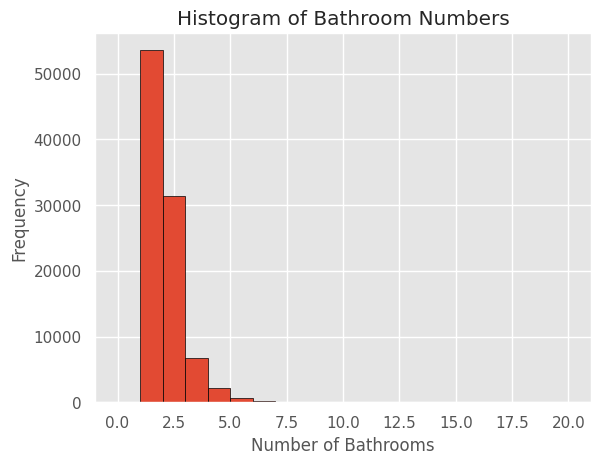

In [ ]:
plt.hist(df_madrid_kf["BATHNUMBER"], bins=int(df_madrid_kf["BATHNUMBER"].max()), edgecolor='black')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Frequency')
plt.title('Histogram of Bathroom Numbers')
plt.show()

In [ ]:
#Detecting the outliers using the IQR

def detect_outliers(data_series, threshold=5):

    Q1 = np.percentile(data_series, 25)
    Q3 = np.percentile(data_series, 75)

    # Calculate the IQR (Interquartile Range)
    IQR = Q3 - Q1

    # Calculate the lower and upper bounds for outlier detection
    lower_bound = Q1 - (threshold * IQR)
    upper_bound = Q3 + (threshold * IQR)

    # Detect and return the outliers
    outliers = data_series[(data_series < lower_bound) | (data_series > upper_bound)]
    return outliers

outliers = detect_outliers(df_madrid_kf["BATHNUMBER"])

# Display the outliers (if any)
print("Outliers:")
print(outliers)

Outliers:
485      11
507      13
521      11
1283      9
2289      8
         ..
50167    18
55221     8
59704    13
62495     9
70547    14
Name: BATHNUMBER, Length: 66, dtype: int64


⏩⏩⏩⏩⏩ **Consult to David if I should use more advance methods such as ["desviacion estandar", "DBScan", "IsolationForest"]**

⏩⏩⏩⏩⏩ **How should I define the cut line?**
⏩⏩⏩⏩⏩ **How should I define the threshold?**

In [ ]:
#No bath counting
no_bath = df_madrid_kf[df_madrid_kf['BATHNUMBER'] == 0]['BATHNUMBER'].count()
print("Number of properties w/out bath is ", no_bath)


Number of properties w/out bath is  89


In [ ]:
#Properties with more than 7 bathrooms
count_higher_than_X_BATHS = df_madrid_kf[df_madrid_kf['BATHNUMBER'] > 7]['BATHNUMBER'].count()
print("Number of properties with more than X bath is ", count_higher_than_X_BATHS)

Number of properties with more than X bath is  66


In [ ]:
#Checking the Properties with no Baths
filtered_df_baths_0 = df_madrid_kf[(df_madrid_kf['BATHNUMBER'] == 0)]
filtered_df_baths_0.head()

,ASSETID,PERIOD,PRICE,UNITPRICE,CONSTRUCTEDAREA,ROOMNUMBER,BATHNUMBER,HASLIFT,ISDUPLEX,ISSTUDIO,CADCONSTRUCTIONYEAR,BUILTTYPEID_1,BUILTTYPEID_2,BUILTTYPEID_3,DISTANCE_TO_CITY_CENTER,DISTANCE_TO_METRO,DISTANCE_TO_CASTELLANA,LOGPRICE,LOCATIONNAME
750,A3036109355890637443,201812,1942000,6696.551724,290,0,0,1,0,0,1900,0,1,0,0.807365,0.477546,1.601367,14.479229,Palacio
821,A3036109355890637443,201812,2521000,8693.103448,290,0,0,1,0,0,1900,0,1,0,0.804994,0.469902,1.601253,14.740166,Palacio
966,A3036109355890637443,201812,2249000,7755.172414,290,0,0,1,0,0,1900,0,1,0,0.855518,0.480165,1.662350,14.625996,Palacio
1368,A1034208215991629606,201803,840000,5316.455696,158,0,0,1,0,0,1900,0,1,0,0.535514,0.150035,1.364673,13.641157,Palacio
1387,A1034208215991629606,201803,749000,4740.506329,158,0,0,1,0,0,1900,0,1,0,0.497874,0.106661,1.329012,13.526494,Palacio


In [ ]:
#Cruzar número de baños vs area construida para detección de outliers y filtrar IDs

In [ ]:
#Checking the Properties with more than X baths
filtered_df_baths_X = df_madrid_kf[(df_madrid_kf['BATHNUMBER'] > 7)]
filtered_df_baths_X.head(10)

,ASSETID,PERIOD,PRICE,UNITPRICE,CONSTRUCTEDAREA,ROOMNUMBER,BATHNUMBER,HASLIFT,ISDUPLEX,ISSTUDIO,CADCONSTRUCTIONYEAR,BUILTTYPEID_1,BUILTTYPEID_2,BUILTTYPEID_3,DISTANCE_TO_CITY_CENTER,DISTANCE_TO_METRO,DISTANCE_TO_CASTELLANA,LOGPRICE,LOCATIONNAME
485,A13223092281294964488,201812,1823000,3728.016360,489,15,11,1,0,0,1888,0,0,1,0.497021,0.086253,1.306800,14.415994,Palacio
507,A3830538955165174052,201809,1875000,4076.086957,460,14,13,1,0,0,1923,0,1,0,0.543245,0.156364,1.329537,14.444119,Palacio
521,A13223092281294964488,201812,1890000,3865.030675,489,15,11,1,0,0,1888,0,0,1,0.502147,0.081118,1.313134,14.452087,Palacio
1283,A11062411078831478929,201803,2606000,6614.213198,394,11,9,0,0,0,1935,0,0,1,0.523289,0.227916,1.342065,14.773327,Palacio
2289,A8855113609359254038,201812,659000,4144.654088,159,7,8,0,0,0,1900,0,0,1,0.447105,0.322364,1.180430,13.398479,Sol
2368,A8855113609359254038,201812,650000,4088.050314,159,7,8,0,0,0,1900,0,0,1,0.405751,0.287771,1.116000,13.384728,Sol
2426,A5918464817569276915,201803,2594000,8823.129252,294,12,8,1,0,0,1926,0,0,1,0.428816,0.004135,1.072973,14.768712,Sol
2503,A7931273333032694235,201812,1415000,5728.744939,247,10,10,1,0,0,1988,0,1,0,0.212298,0.205678,0.811085,14.162640,Sol
2507,A5310425540422110498,201812,1937000,6588.435374,294,11,12,1,0,0,1942,0,0,1,0.360567,0.127104,0.944070,14.476651,Sol
2844,A467033500576113370,201809,1499000,4804.487179,312,11,11,1,0,0,1920,0,0,1,0.401516,0.098129,0.661386,14.220309,Sol


In [ ]:
filtered_df_baths_X = df_madrid_kf[(df_madrid_kf['BATHNUMBER'] > 7) & (df_madrid_kf['CONSTRUCTEDAREA'] < 200)]
filtered_df_baths_X.head()

,ASSETID,PERIOD,PRICE,UNITPRICE,CONSTRUCTEDAREA,ROOMNUMBER,BATHNUMBER,HASLIFT,ISDUPLEX,ISSTUDIO,CADCONSTRUCTIONYEAR,BUILTTYPEID_1,BUILTTYPEID_2,BUILTTYPEID_3,DISTANCE_TO_CITY_CENTER,DISTANCE_TO_METRO,DISTANCE_TO_CASTELLANA,LOGPRICE,LOCATIONNAME
2289,A8855113609359254038,201812,659000,4144.654088,159,7,8,0,0,0,1900,0,0,1,0.447105,0.322364,1.180430,13.398479,Sol
2368,A8855113609359254038,201812,650000,4088.050314,159,7,8,0,0,0,1900,0,0,1,0.405751,0.287771,1.116000,13.384728,Sol
5966,A12905377892047799178,201809,775000,3914.141414,198,8,8,0,0,0,1860,0,0,1,0.608875,0.038549,0.533960,13.560618,LavapiÃ©s-Embajadores
10144,A12905377892047799178,201809,864000,4363.636364,198,8,8,0,0,0,1860,0,0,1,0.618434,0.038013,0.472003,13.669328,Huertas-Cortes
22032,A7717710800352113329,201809,1007000,5300.000000,190,7,8,0,0,0,1969,0,0,1,0.509968,0.124237,0.643883,13.822486,Chueca-Justicia


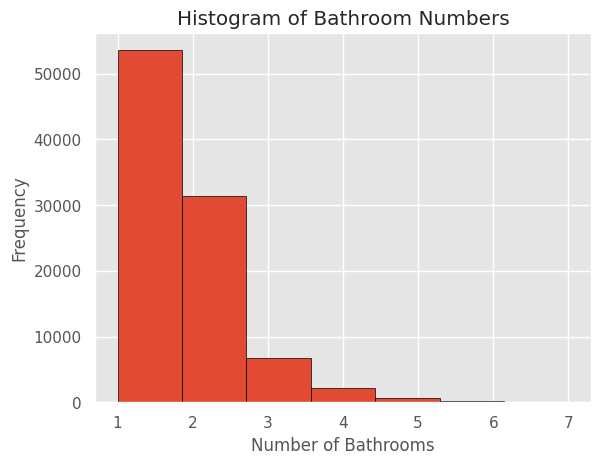

In [ ]:
#Visualization of the variable if we eliminate the outliers.
filtered_df_baths_X_L = df_madrid_kf.drop(df_madrid_kf[(df_madrid_kf['BATHNUMBER'] > 7) | (df_madrid_kf['BATHNUMBER'] == 0)].index)
plt.hist(filtered_df_baths_X_L["BATHNUMBER"], bins=int(filtered_df_baths_X_L["BATHNUMBER"].max()), edgecolor='black')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Frequency')
plt.title('Histogram of Bathroom Numbers')
plt.show()

⏩⏩⏩⏩⏩ **To confirm what to do with the outliers where the constructed area is also big**

In [ ]:
#Droping the outliers

df_madrid_kf = df_madrid_kf.drop(df_madrid_kf[(df_madrid_kf['BATHNUMBER'] > 7) & (df_madrid_kf['CONSTRUCTEDAREA'] < 200)].index)
df_madrid_kf = df_madrid_kf.drop(df_madrid_kf[df_madrid_kf['BATHNUMBER'] == 0].index)

#Other data will be treated in the CONSTRUCTEDAREA variable

####ROOMS

In [ ]:
df_madrid_kf["ROOMNUMBER"].describe()

count    94628.000000
mean         2.581329
std          1.242378
min          0.000000
25%          2.000000
50%          3.000000
75%          3.000000
max         93.000000
Name: ROOMNUMBER, dtype: float64

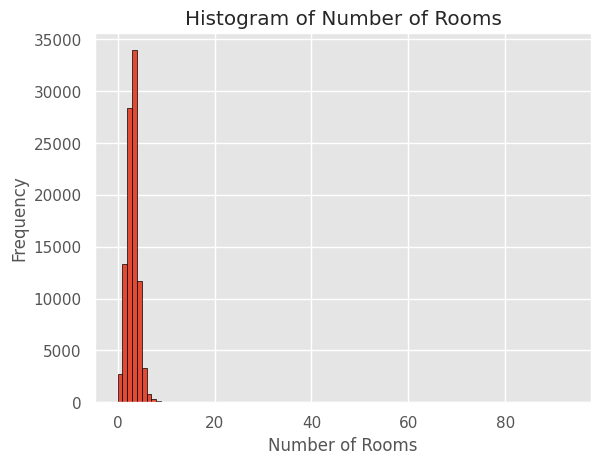

In [ ]:
plt.hist(df_madrid_kf["ROOMNUMBER"], bins=int(df_madrid_kf["ROOMNUMBER"].max()), edgecolor='black')
plt.xlabel('Number of Rooms')
plt.ylabel('Frequency')
plt.title('Histogram of Number of Rooms')
plt.show()

In [ ]:
#Detecting the outliers using the IQR

def detect_outliers(data_series, threshold=5):

    Q1 = np.percentile(data_series, 25)
    Q3 = np.percentile(data_series, 75)

    # Calculate the IQR (Interquartile Range)
    IQR = Q3 - Q1

    # Calculate the lower and upper bounds for outlier detection
    lower_bound = Q1 - (threshold * IQR)
    upper_bound = Q3 + (threshold * IQR)

    # Detect and return the outliers
    outliers = data_series[(data_series < lower_bound) | (data_series > upper_bound)]
    return outliers

outliers = detect_outliers(df_madrid_kf["ROOMNUMBER"])

# Display the outliers (if any)
print("Outliers:")
print(outliers)

Outliers:
485      15
507      14
521      15
904      13
1283     11
         ..
75951    12
84061    33
84158     9
86405    11
90574    93
Name: ROOMNUMBER, Length: 115, dtype: int64


In [ ]:
#No Room counting
no_room = df_madrid_kf[df_madrid_kf['ROOMNUMBER'] == 0]['ROOMNUMBER'].count()
print("Number of properties w/out room is ", no_room)

Number of properties w/out room is  2686


In [ ]:
#Properties with more than 5 Rooms
count_higher_than_X_ROOMS = df_madrid_kf[df_madrid_kf['ROOMNUMBER'] > 7]['ROOMNUMBER'].count()
print("Number of properties with more than X Rooms is ", count_higher_than_X_ROOMS)

Number of properties with more than X Rooms is  254


In [ ]:
#Checking the Properties with no ROOMS
filtered_df_rooms_0 = df_madrid_kf[(df_madrid_kf['ROOMNUMBER'] == 0)]
filtered_df_rooms_0.head()

#Check si es coherente el isstudio con 0 rooms [TBD]

,ASSETID,PERIOD,PRICE,UNITPRICE,CONSTRUCTEDAREA,ROOMNUMBER,BATHNUMBER,HASLIFT,ISDUPLEX,ISSTUDIO,CADCONSTRUCTIONYEAR,BUILTTYPEID_1,BUILTTYPEID_2,BUILTTYPEID_3,DISTANCE_TO_CITY_CENTER,DISTANCE_TO_METRO,DISTANCE_TO_CASTELLANA,LOGPRICE,LOCATIONNAME
43,A4580058406990243641,201803,146000,1946.666667,75,0,1,1,0,1,2007,0,0,1,6.128439,0.498755,4.686726,11.891362,Pau de Carabanchel
45,A9236955285777824735,201812,244000,1718.309859,142,0,1,1,1,1,2007,0,0,1,6.140958,0.509010,4.693916,12.404924,Pau de Carabanchel
46,A921759376766310527,201803,185000,2642.857143,70,0,2,1,0,1,2007,0,0,1,6.204558,0.573359,4.755125,12.128111,Pau de Carabanchel
47,A4580058406990243641,201803,131000,1746.666667,75,0,1,1,0,1,2007,0,0,1,6.166830,0.532248,4.712198,11.782953,Pau de Carabanchel
50,A4580058406990243641,201803,119000,1586.666667,75,0,1,1,0,1,2007,0,0,1,6.133726,0.502780,4.689199,11.686879,Pau de Carabanchel


In [ ]:
#Checking the Properties with more than X Rooms
filtered_df_room_X = df_madrid_kf[(df_madrid_kf['ROOMNUMBER'] > 7)]
filtered_df_room_X.head()

,ASSETID,PERIOD,PRICE,UNITPRICE,CONSTRUCTEDAREA,ROOMNUMBER,BATHNUMBER,HASLIFT,ISDUPLEX,ISSTUDIO,CADCONSTRUCTIONYEAR,BUILTTYPEID_1,BUILTTYPEID_2,BUILTTYPEID_3,DISTANCE_TO_CITY_CENTER,DISTANCE_TO_METRO,DISTANCE_TO_CASTELLANA,LOGPRICE,LOCATIONNAME
485,A13223092281294964488,201812,1823000,3728.016360,489,15,11,1,0,0,1888,0,0,1,0.497021,0.086253,1.306800,14.415994,Palacio
507,A3830538955165174052,201809,1875000,4076.086957,460,14,13,1,0,0,1923,0,1,0,0.543245,0.156364,1.329537,14.444119,Palacio
521,A13223092281294964488,201812,1890000,3865.030675,489,15,11,1,0,0,1888,0,0,1,0.502147,0.081118,1.313134,14.452087,Palacio
904,A1014165187227163222,201812,3790000,5987.361769,633,13,3,1,0,0,1957,0,1,0,0.704607,0.274071,1.531569,15.147877,Palacio
1283,A11062411078831478929,201803,2606000,6614.213198,394,11,9,0,0,0,1935,0,0,1,0.523289,0.227916,1.342065,14.773327,Palacio


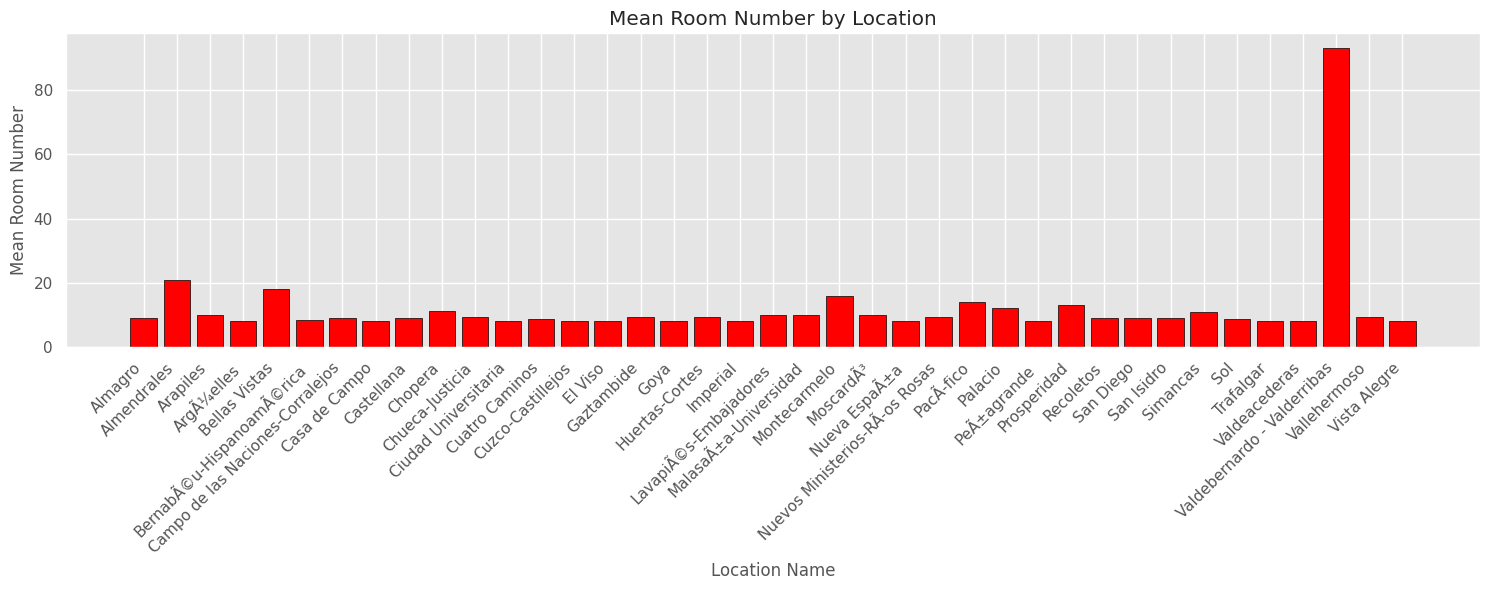

In [ ]:
grouped_data = filtered_df_room_X.groupby('LOCATIONNAME')['ROOMNUMBER'].mean()
locations = grouped_data.index
mean_room_numbers = grouped_data.values
plt.figure(figsize=(15, 6))
plt.bar(locations, mean_room_numbers, color='red', edgecolor='black')
plt.xlabel('Location Name')
plt.ylabel('Mean Room Number')
plt.title('Mean Room Number by Location')
# Rotate the x-axis labels for better readability (optional)
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.tight_layout()
plt.show()

In [ ]:
filtered_df_outrooms = df_madrid_kf[(df_madrid_kf['ROOMNUMBER'] > 15)]
filtered_df_outrooms.head(10)

,ASSETID,PERIOD,PRICE,UNITPRICE,CONSTRUCTEDAREA,ROOMNUMBER,BATHNUMBER,HASLIFT,ISDUPLEX,ISSTUDIO,CADCONSTRUCTIONYEAR,BUILTTYPEID_1,BUILTTYPEID_2,BUILTTYPEID_3,DISTANCE_TO_CITY_CENTER,DISTANCE_TO_METRO,DISTANCE_TO_CASTELLANA,LOGPRICE,LOCATIONNAME
5944,A10890717256114634423,201803,2020000,2384.887839,847,20,16,0,0,0,1880,0,0,1,0.593355,0.118450,0.620191,14.518608,LavapiÃ©s-Embajadores
24173,A663331451900776597,201812,6970000,9111.111111,765,18,4,1,0,0,1920,0,0,1,2.054424,0.157345,0.183580,15.757126,Almagro
30703,A17627365699669776098,201806,850000,1416.666667,600,20,20,0,0,0,1970,0,1,0,2.386553,0.319877,1.130627,13.652992,PacÃ­fico
41681,A13257006465938206810,201812,1956000,5015.384615,390,16,10,1,0,0,1956,0,0,1,2.113245,0.347473,2.065421,14.486412,Gaztambide
50167,A11283046039122813948,201812,1469000,3228.571429,455,18,18,1,0,0,1920,0,0,1,3.710471,0.079898,1.113646,14.200092,Bellas Vistas
70547,A17571680586920233983,201809,3375000,4963.235294,680,16,14,1,0,0,2017,0,0,1,10.523928,0.741082,3.179736,15.031906,Montecarmelo
84061,A8866129769871540210,201806,109000,1211.111111,90,33,2,1,0,0,1998,0,0,1,3.609483,0.382614,1.099899,11.599103,Almendrales
90574,A10991866817670907438,201803,450000,3781.512605,119,93,2,1,0,0,2001,0,0,1,7.020016,0.197061,5.852950,13.017003,Valdebernardo - Valderribas


In [ ]:

mean_room_number = df_madrid_kf['ROOMNUMBER'].mean()

# Update the values for the specified IDs with the mean value
ids_to_modify = ["A8866129769871540210", "A10991866817670907438"]

for id_to_modify in ids_to_modify:
    df_madrid_kf.loc[df_madrid_kf['ASSETID'] == id_to_modify, 'ROOMNUMBER'] = mean_room_number


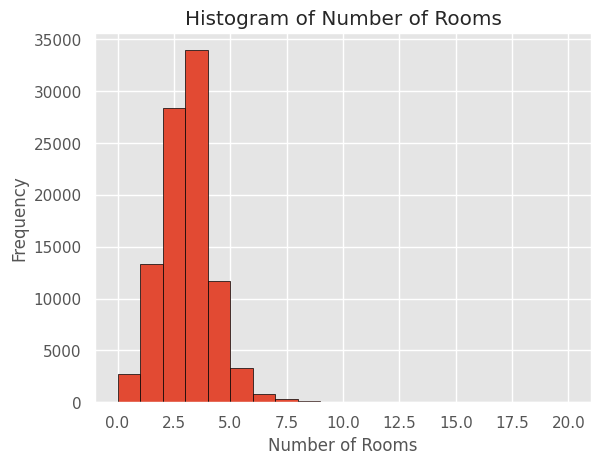

In [ ]:
#Plotting the variable w/out wide outliers
plt.hist(df_madrid_kf["ROOMNUMBER"], bins=int(df_madrid_kf["ROOMNUMBER"].max()), edgecolor='black')
plt.xlabel('Number of Rooms')
plt.ylabel('Frequency')
plt.title('Histogram of Number of Rooms')
plt.show()

In [ ]:
#Testear una regresión, y todo lo que salga del intervalo del 95% de confianza [eliminarlo o imputarlo]

####DUPLICADOS

In [ ]:
#Checking the number of duplicates
N_duplicados = df_madrid_kf['ASSETID'].duplicated().sum()

print("Número de campos duplicados: ", N_duplicados)

Número de campos duplicados:  18963


In [ ]:
#Checking the number of unique values
df_madrid['ASSETID'].value_counts()

A5463639993615125363     11
A2282202115281541721      9
A14882068007191593522     9
A1315840462730187222      8
A9858360437524013306      7
                         ..
A5826764172379406417      1
A16722571109094138864     1
A1988144240822519294      1
A7844100287365531952      1
A16209156240845128524     1
Name: ASSETID, Length: 75738, dtype: int64

In [ ]:
#Checking the values by the PERIOD
df_madrid['PERIOD'].value_counts()

201812    44237
201803    21893
201809    15958
201806    12639
Name: PERIOD, dtype: int64

In [ ]:
#Droping the duplicates based on the last period of the sample
df_madrid_kf.sort_values(by='PERIOD', ascending=False, inplace=True)
df_madrid_kf.drop_duplicates(subset='ASSETID', keep='first', inplace=True)
df_madrid_kf.reset_index(drop=True, inplace=True)

df_madrid_kf['ASSETID'].duplicated().sum()

0

In [ ]:
df_madrid['ASSETID'].value_counts()

A5463639993615125363     11
A2282202115281541721      9
A14882068007191593522     9
A1315840462730187222      8
A9858360437524013306      7
                         ..
A5826764172379406417      1
A16722571109094138864     1
A1988144240822519294      1
A7844100287365531952      1
A16209156240845128524     1
Name: ASSETID, Length: 75738, dtype: int64

In [ ]:
#Reponderar la población
#Darle un peso a los períodos con menores muestras [eg. multiplicar por 1.5] ---> Elevadores Muestrales ()
#Lo último se aplicaría en el modelo
#Mejoras de optimización [No priority]

####Target Encoding - Locationname (MEAN)

In [ ]:
mean_unit_price_by_location = df_madrid_kf.groupby('LOCATIONNAME')['UNITPRICE'].mean()
df_madrid_kf['LOCATION_MEAN_UNITPRICE'] = df_madrid_kf['LOCATIONNAME'].map(mean_unit_price_by_location)

df_madrid_kf.head()

,ASSETID,PERIOD,PRICE,UNITPRICE,CONSTRUCTEDAREA,ROOMNUMBER,BATHNUMBER,HASLIFT,ISDUPLEX,ISSTUDIO,CADCONSTRUCTIONYEAR,BUILTTYPEID_1,BUILTTYPEID_2,BUILTTYPEID_3,DISTANCE_TO_CITY_CENTER,DISTANCE_TO_METRO,DISTANCE_TO_CASTELLANA,LOGPRICE,LOCATIONNAME,LOCATION_MEAN_UNITPRICE
0,A15019136831406238029,201803,126000,2680.851064,47,1,1,1,0,0,2005,0,1,0,8.058429,0.872075,6.868677,11.744037,Pau de Carabanchel,2865.579346
1,A18358421103986858200,201803,210000,2413.793103,87,2,2,1,0,0,2006,0,0,1,8.102608,0.891646,6.899154,12.254863,Pau de Carabanchel,2865.579346
2,A12760275757741995501,201803,207000,2379.310345,87,2,2,1,0,0,2005,0,1,0,8.092701,0.863863,6.876878,12.240474,Pau de Carabanchel,2865.579346
3,A15624054548296987840,201803,176000,3142.857143,56,1,1,1,0,0,2005,0,0,1,8.080657,0.872988,6.878479,12.078239,Pau de Carabanchel,2865.579346
4,A1152949908600176968,201803,236000,2712.643678,87,2,2,1,0,0,2006,0,0,1,8.078538,0.878235,6.880998,12.371587,Pau de Carabanchel,2865.579346


In [ ]:
output_csv_file = 'BBDD_after_traget_encoder.csv'
df_madrid_kf.to_csv(output_csv_file, index=False)

print(f"DataFrame has been exported to {output_csv_file}.")

DataFrame has been exported to BBDD_after_traget_encoder.csv.


####PRICE and UNIT PRICE

In [ ]:
df_madrid["UNIT_PRICE_LOG"] = np.log(df_madrid["UNITPRICE"])


In [ ]:
#Box-cox -----> Puede valer para una regresión, posiblemente no sea necesario para los árboles

from sklearn.preprocessing import PowerTransformer

p_method = 'yeo-johnson' #try it with 'box-cox'
power_transform = PowerTransformer(method=p_method)
X_power = power_transform.fit_transform(X_train[num_features_selected])

#Let's put it back to a pandas dataframe
X_train_power = pd.DataFrame(X_power,
                              index=X_train[num_features_selected].index,
                              columns=X_train[num_features_selected].columns)

In [ ]:
#Yeo-johnson ---> Permite trabajar con valores negativos

from sklearn.preprocessing import PowerTransformer

p_method = 'yeo-johnson' #try it with 'box-cox'
power_transform = PowerTransformer(method=p_method)
X_power = power_transform.fit_transform(X_train[num_features_selected])

#Let's put it back to a pandas dataframe
X_train_power = pd.DataFrame(X_power,
                              index=X_train[num_features_selected].index,
                              columns=X_train[num_features_selected].columns)

####'CADCONSTRUCTIONYEAR'



#Final Dataset

In [ ]:
df_madrid_kf.head()

,ASSETID,PERIOD,PRICE,UNITPRICE,CONSTRUCTEDAREA,ROOMNUMBER,BATHNUMBER,HASLIFT,ISDUPLEX,ISSTUDIO,CADCONSTRUCTIONYEAR,BUILTTYPEID_1,BUILTTYPEID_2,BUILTTYPEID_3,DISTANCE_TO_CITY_CENTER,DISTANCE_TO_METRO,DISTANCE_TO_CASTELLANA,LOGPRICE,LOCATIONNAME,LOCATION_MEAN_UNITPRICE
0,A17023875386415971433,201812,319000,3797.619048,84,1.0,1,0,0,0,1926,0,0,1,3.665571,0.102813,2.077489,12.672946,Fuente del Berro,4290.453591
1,A5559302228076794761,201812,168000,2301.369863,73,3.0,1,0,0,0,1969,0,0,1,5.400071,0.575416,5.511807,12.031719,Aluche,2203.658767
2,A5296405608375472602,201812,234000,2785.714286,84,3.0,2,1,0,0,1969,0,0,1,5.449278,0.539480,5.582193,12.363076,Aluche,2203.658767
3,A1410201971800819809,201812,243000,3037.500000,80,3.0,2,1,0,0,1969,0,0,1,5.438809,0.555598,5.583689,12.400817,Aluche,2203.658767
4,A2977299771999319872,201812,208000,2971.428571,70,3.0,1,1,0,0,1969,0,0,1,5.537502,0.472613,5.680896,12.245293,Aluche,2203.658767


In [ ]:
columns_to_drop_Final = ['ASSETID',
 'PERIOD',
 #'PRICE',
 #'UNITPRICE',
 #'CONSTRUCTEDAREA',
 #'ROOMNUMBER',
 #'BATHNUMBER',
 #'HASLIFT',
 #'ISDUPLEX',
 #'ISSTUDIO',
 #'CADCONSTRUCTIONYEAR',
 #'BUILTTYPEID_1',
 #'BUILTTYPEID_2',
 #'BUILTTYPEID_3',
 #'DISTANCE_TO_CITY_CENTER',
 #'DISTANCE_TO_METRO',
 #'DISTANCE_TO_CASTELLANA',
 #'LOGPRICE',
 'LOCATIONNAME',
 #LOCATION_MEAN_UNITPRICE
                   ]

In [ ]:
df_madrid_model = df_madrid_kf.drop(columns=columns_to_drop_Final)
df_madrid_model.head()

,PRICE,UNITPRICE,CONSTRUCTEDAREA,ROOMNUMBER,BATHNUMBER,HASLIFT,ISDUPLEX,ISSTUDIO,CADCONSTRUCTIONYEAR,BUILTTYPEID_1,BUILTTYPEID_2,BUILTTYPEID_3,DISTANCE_TO_CITY_CENTER,DISTANCE_TO_METRO,DISTANCE_TO_CASTELLANA,LOGPRICE,LOCATION_MEAN_UNITPRICE
0,319000,3797.619048,84,1.0,1,0,0,0,1926,0,0,1,3.665571,0.102813,2.077489,12.672946,4290.453591
1,168000,2301.369863,73,3.0,1,0,0,0,1969,0,0,1,5.400071,0.575416,5.511807,12.031719,2203.658767
2,234000,2785.714286,84,3.0,2,1,0,0,1969,0,0,1,5.449278,0.539480,5.582193,12.363076,2203.658767
3,243000,3037.500000,80,3.0,2,1,0,0,1969,0,0,1,5.438809,0.555598,5.583689,12.400817,2203.658767
4,208000,2971.428571,70,3.0,1,1,0,0,1969,0,0,1,5.537502,0.472613,5.680896,12.245293,2203.658767


In [ ]:
output_csv_file = 'df_madrid_model.csv'
df_madrid_model.to_csv(output_csv_file, index=False)

print(f"DataFrame has been exported to {output_csv_file}.")

DataFrame has been exported to df_madrid_model.csv.


In [ ]:
#Eliminar las variables rebundantes de precio ----> VARIABLE OBJETIVO ()